In [1]:
from sriApp.modelos.lsi_model import LSIModel
from ir_datasets import load
import matplotlib.pyplot as plt
import statistics as stat
import time
import numpy as np
#from extract_lg import extract_Dk_Rq

In [2]:
datasets = {
    "beir/arguana": {'count': 8674},
    #"beir/dbpedia-entity": {'count': 4635922},
    "beir/fiqa": {'count': 57638},
    "beir/cqadupstack/android": {'count': 22998},
    "beir/cqadupstack/english": {'count': 40221},
    "beir/cqadupstack/gaming": {'count': 45301},
    "beir/cqadupstack/gis": {'count': 37637},
    "beir/cqadupstack/mathematica": {'count': 16705},
    "beir/cqadupstack/physics": {'count': 38316},
    "beir/cqadupstack/programmers": {'count': 32176},
    "beir/cqadupstack/stats": {'count': 42269},
    "beir/cqadupstack/tex": {'count': 68184},
    "beir/cqadupstack/unix": {'count': 47382},
    "beir/cqadupstack/webmasters": {'count': 17405},
    "beir/cqadupstack/wordpress": {'count': 48605},
    "cranfield": {'count': 1400}
}

In [3]:
dataset_name = "beir/cqadupstack/gaming"
lsi_model = LSIModel(dataset_name)

CARGADO Modelo Latente


In [4]:
dataset = load(dataset_name)
queries=[]
index=1
for querie in dataset.queries_iter():
    queries.append((querie.text, index))
    index+=1

In [7]:
queries[1]

("It is immoral to kill animals  As evolved human beings it is our moral duty to inflict as little pain as possible for our survival. So if we do not need to inflict pain to animals in order to survive, we should not do it. Farm animals such as chickens, pigs, sheep, and cows are sentient living beings like us - they are our evolutionary cousins and like us they can feel pleasure and pain. The 18th century utilitarian philosopher Jeremy Bentham even believed that animal suffering was just as serious as human suffering and likened the idea of human superiority to racism. It is wrong to farm and kill these animals for food when we do not need to do so. The methods of farming and slaughter of these animals are often barbaric and cruel - even on supposedly 'free range' farms. [1] Ten billion animals were slaughtered for human consumption each year, stated PETA. And unlike the farms long time ago, where animals roamed freely, today, most animals are factory farmed: \x97crammed into cages wh

In [171]:
responses = {}

times = np.zeros(len(queries))
index = 0
for q in queries:
    start = time.time()
    responses[q[1]] = list(lsi_model.SearchResuts(q[0]))    
    end = time.time()
    times[index] = end-start
    index += 0


0.00037108209398057724

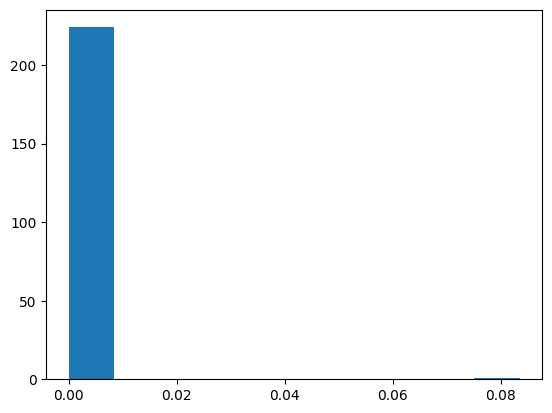

In [181]:
plt.hist(times)
print(times.mean(), times.std())

In [174]:
new_qrels = {}
for qrel in dataset.qrels_iter():
    if qrel.relevance > 0:
        s = new_qrels.get(int(qrel.query_id), set())
        s.add(int(qrel.doc_id))
        new_qrels[int(qrel.query_id)] = s

In [175]:
def responses_umbral(responses, alpha):
    new_response = {}
    for key, list_datavalue in responses.items():
        new_response[key]= [datavalue.data for datavalue in responses[key] if datavalue.value > alpha]
    return new_response

In [135]:
def responses_r(responses, count):
    new_response = {}
    for key, list_datavalue in responses.items():
        new_response[key]= [datavalue.data for datavalue in responses[key]][:count]
    return new_response

In [136]:
def get_medidas(responses):
    medidas = {}
    for query_id, qrel in new_qrels.items():
        medidas[query_id] = (len(responses[query_id]), len(qrel), len(qrel.intersection(responses[query_id])))    
    return medidas

In [137]:
def get_recall_accuracy(medidas):
    recall = {}
    accuracy = {}
    for key, (rec, rel, rr) in medidas.items():
        if rec != 0:
            accuracy[key] = rr/rec
        else:        
            accuracy[key] = 0
        recall[key] = rr/rel
    return recall, accuracy

In [164]:
responses_0 = responses_umbral(responses, 0.0)
responses_1 = responses_umbral(responses, 0.1)
responses_2 = responses_umbral(responses, 0.2)
responses_3 = responses_umbral(responses, 0.3)
responses_r25 = responses_r(responses, 25)
responses_r50 = responses_r(responses, 50)
responses_r75 = responses_r(responses, 75)
responses_r100 = responses_r(responses, 100)

In [165]:
m_0 = get_medidas(responses_0)
m_1 = get_medidas(responses_1)
m_2 = get_medidas(responses_2)
m_3 = get_medidas(responses_3)
m_r25 = get_medidas(responses_r25)
m_r50 = get_medidas(responses_r50)
m_r75 = get_medidas(responses_r75)
m_r100 = get_medidas(responses_r100)

In [166]:
r_0, a_0 = get_recall_accuracy(m_0)
r_1, a_1 = get_recall_accuracy(m_1)
r_2, a_2 = get_recall_accuracy(m_2)
r_3, a_3 = get_recall_accuracy(m_3)
r_25, a_25 = get_recall_accuracy(m_r25)
r_50, a_50 = get_recall_accuracy(m_r50)
r_75, a_75 = get_recall_accuracy(m_r75)
r_100, a_100 = get_recall_accuracy(m_r100)

In [141]:
def plot_recall_accuracy(recall, accuracy):
    plt.scatter(recall.values(), accuracy.values(), alpha=0.1)
    recall_mean, accuracy_mean = stat.mean(recall.values()), stat.mean(accuracy.values())
    print(recall_mean, accuracy_mean)
    plt.scatter(recall_mean, accuracy_mean)

0.6943575993054837 0.007535717279486327


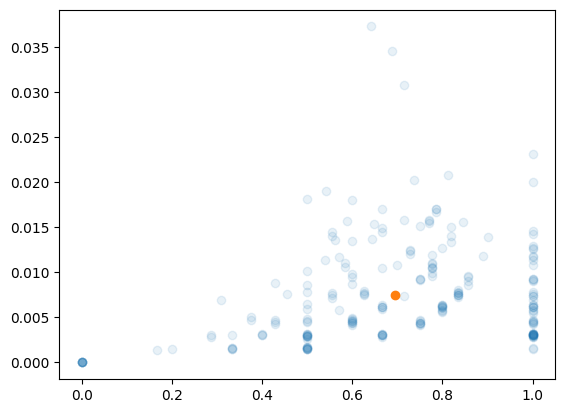

In [167]:
plot_recall_accuracy(r_0,a_0)

0.6266666666666667 0.004838982450209372


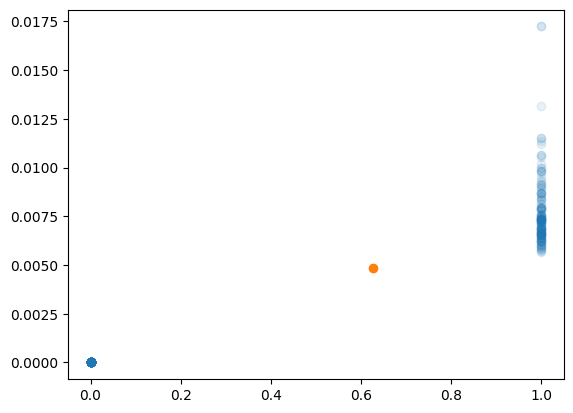

In [143]:
plot_recall_accuracy(r_1,a_1)

0.3377777777777778 0.012910162619004939


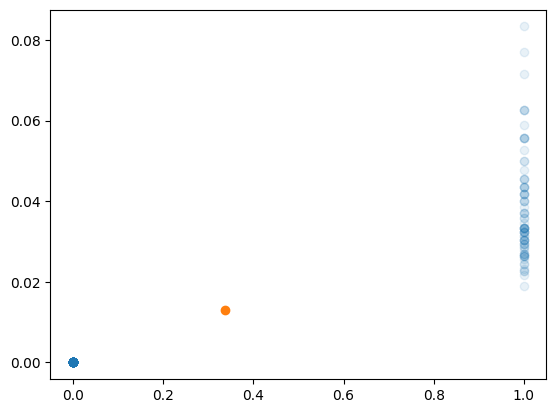

In [144]:
plot_recall_accuracy(r_2,a_2)

0.16 0.025702996350055175


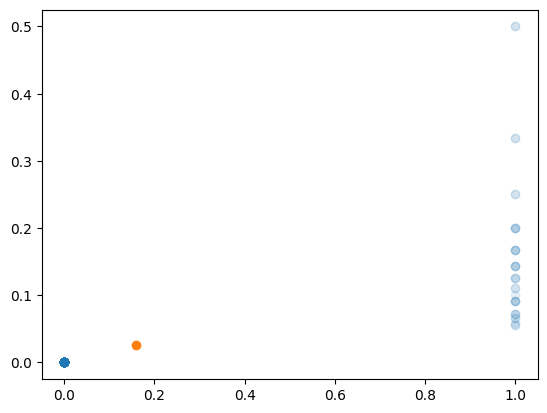

In [145]:
plot_recall_accuracy(r_3,a_3)

0.3288888888888889 0.013155555555555556


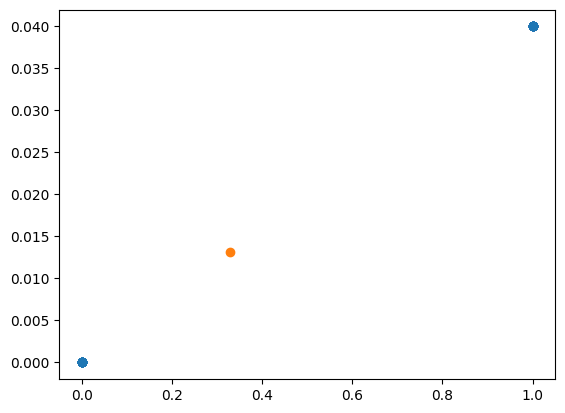

In [146]:
plot_recall_accuracy(r_25,a_25)

0.4622222222222222 0.009244444444444444


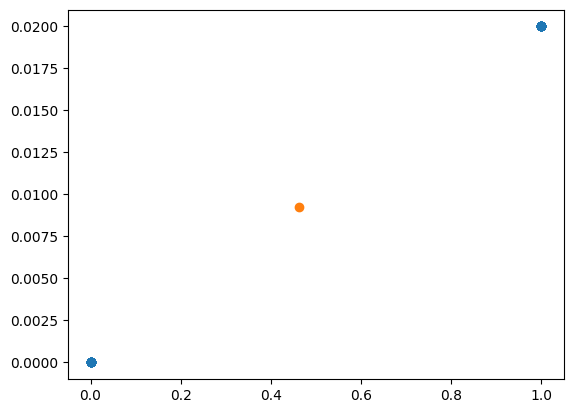

In [147]:
plot_recall_accuracy(r_50,a_50)

0.5244444444444445 0.006992592592592593


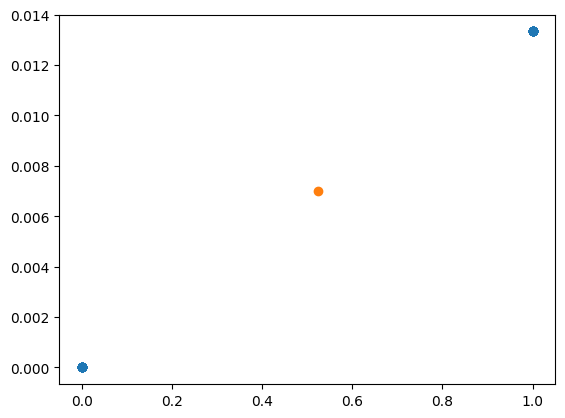

In [148]:
plot_recall_accuracy(r_75,a_75)

0.5866666666666667 0.005866666666666667


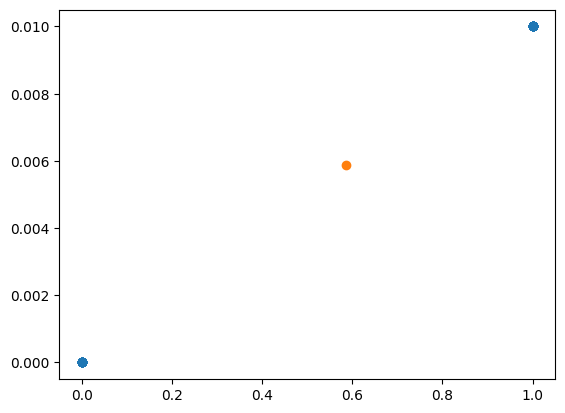

In [149]:
plot_recall_accuracy(r_100,a_100)

In [168]:
def plot_means(medidas, names):
    index = 0
    for recall, accuracy in medidas:
        recall_mean, accuracy_mean = stat.mean(recall.values()), stat.mean(accuracy.values())
        print(recall_mean, accuracy_mean)
        plt.scatter(recall_mean, accuracy_mean, label=names[index])
        index+=1
    plt.legend()

0.6943575993054837 0.007535717279486327
0.3950503994724841 0.019900830381118593
0.21021527111232993 0.05208595019360806
0.10854724288057621 0.09375104887849986
0.20927699950739168 0.05226666666666667
0.27292728132434013 0.03475555555555555
0.3119435102794236 0.027022222222222222
0.36019932888844136 0.022933333333333333


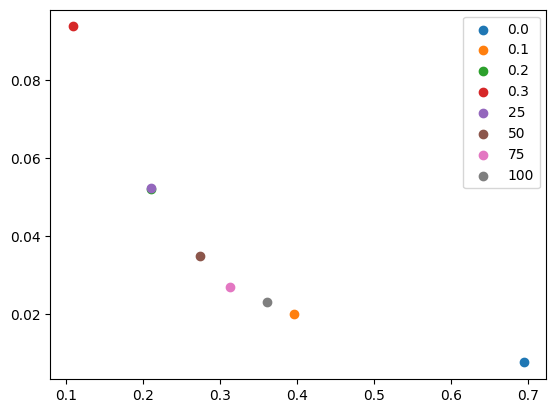

In [169]:
medidas = [
    (r_0, a_0),
    (r_1, a_1),
    (r_2, a_2),
    (r_3, a_3),
    (r_25, a_25),
    (r_50, a_50),
    (r_75, a_75),
    (r_100, a_100),
]
names= ['0.0','0.1','0.2','0.3','25','50','75','100']
plot_means(medidas, names)